In [ ]:
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Dropout, Conv1D, GlobalMaxPool1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model, Sequential

In [ ]:
vocab_size = 1000
(x_train, y_train),(x_test, y_test) = datasets.imdb.load_data(num_words=vocab_size)

In [ ]:
print(x_train[:5])

In [ ]:
max_len = 200
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [ ]:
print(x_train[:5])

In [ ]:
print('x_train is shape:{}'.format(x_train.shape))
print('x_test is shape:{}'.format(x_test.shape))

In [ ]:
print(y_train[:5])

In [ ]:
embeding_dim = 256
dropout_ratio = 0.3
num_filters = 256
kernal_size = 3
hidden_units = 128

In [ ]:
model = Sequential(
    [
        Embedding(vocab_size, embeding_dim),
        Dropout(dropout_ratio),
        Conv1D(num_filters, kernal_size, padding='valid', activation='relu'),
        GlobalMaxPool1D(),
        Dense(hidden_units, activation='relu'),
        Dropout(dropout_ratio),
        Dense(1, activation='sigmoid')
    ]
)

check_point_md = ModelCheckpoint('best_model.h5', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
check_point_st = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), callbacks=[check_point_md, check_point_st])

In [ ]:
pre_data = model.predict(x_test)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_59140\546537339.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(np.arange(10), np.round(pre_data[:10],0),cmap='Purples')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_59140\546537339.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(np.arange(10), y_test[:10], cmap='PuRd')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


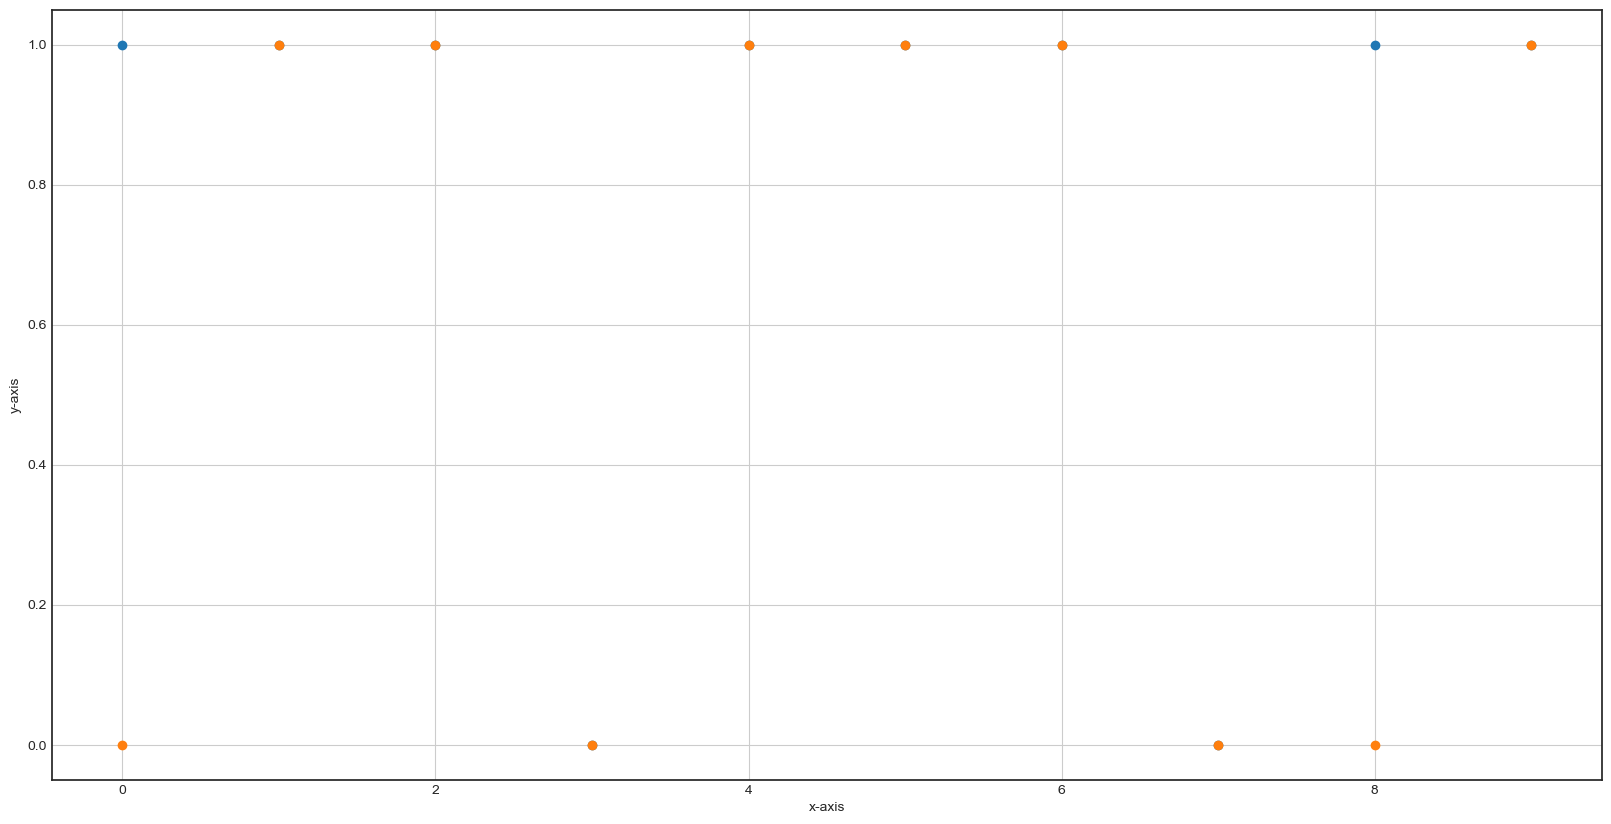

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8-white')

plt.figure(figsize=(20,10))
plt.scatter(np.arange(10), np.round(pre_data[:10],0),cmap='Purples')
plt.scatter(np.arange(10), y_test[:10], cmap='PuRd')

plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.grid()
plt.show()

In [37]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 5s 6ms/step - loss: 0.4711 - acc: 0.8393


[0.471060574054718, 0.8392800092697144]

In [51]:
print(pre_data[:10])
print(np.round(pre_data[:10],0).tolist())

print(y_test[:10])

[[0.7095407 ]
 [0.99993986]
 [0.91322243]
 [0.1854854 ]
 [0.9999476 ]
 [0.99774873]
 [0.98240066]
 [0.00118089]
 [0.99364495]
 [0.9493663 ]]
[[1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0]]
[0 1 1 0 1 1 1 0 0 1]
